In [1]:
import math
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns

import sys  
sys.path.insert(0, '/Documents/NeuroScience-Master/signal_processing/ex2')

import code_part2


## 2. Properties of a single Poisson process with refractory period

In [3]:
r0 = 55/1000
ref_per = 5
rec_per = 6
duration = 90*1000
bin_size = 1

In [383]:
'''
2 - A:

This function get parameters for signle poisson process and return a spike train
A vector of zeros and ones as spikes.
input:
    1. firing rate
    2. refactor period
    3. recovery period
    4. duration time in ms
    5. bin size in ms (have to be 1ms for the binom implementation method)
output:
    1. array of zeros and one - spike train
'''

def generate_poisson_process(r0,ref_per,rec_per,duration,bin_size):
    
    spk_train = np.zeros(duration)
    random_uni_dis = np.random.uniform(size=duration)
    in_ref_per = False 
    in_rec_per = False
    t_rec = 1 # count steps in recovery period
    t = 0
    
    while t < duration:
        if in_ref_per:
            t = t+ref_per # remain zeros at indeces of the refactory period
            in_rec_per = True # swich on the recovery period
            t_rec = 1 # reset the counter for the recovery period
            in_ref_per = False
            
        elif in_rec_per:
            if t_rec <= rec_per:
                if r0*(t_rec/rec_per) > random_uni_dis[t]:
                    spk_train[t] = 1
                    in_ref_per = True # back to the refactory period
            else: 
                in_rec_per = False # When finish the recovery period, continue as usual
                if r0*bin_size > random_uni_dis[t]:
                    spk_train[t] = 1
                    in_ref_per = True
            t_rec = t_rec+1
            t = t+1
                
        
        # normal check, not in refactory or recovery
        else:
            if r0*bin_size > random_uni_dis[t]:
                spk_train[t] = 1
                in_ref_per = True
            t = t+1
            
    return spk_train

In [4]:
spk_train = code_part2.generate_poisson_process(r0,ref_per,rec_per,duration,bin_size)


In [5]:
def convert_train_to_time(skp_train):
    spk_time = np.where(spk_train == 1)[0]
    return spk_time

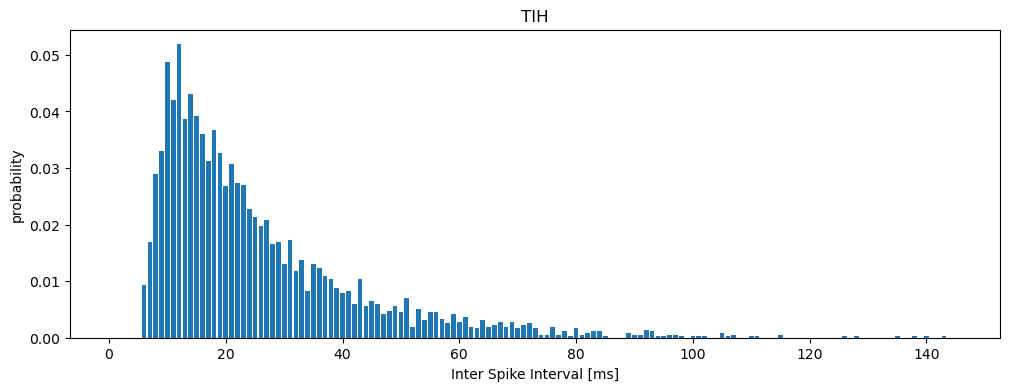

In [6]:
spk_time = convert_train_to_time(spk_train) 
isi_vec = np.diff(spk_time)
tih, _ = np.histogram(isi_vec, bins=np.arange(1,np.max(isi_vec)), density=True)

fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(1,np.max(isi_vec)-1,1),tih)
__ = ax.set_title('TIH')
ax.set_xlabel('Inter Spike Interval [ms]')
ax.set_ylabel('probability');

/var/folders/zx/4crzfjcj5z1bc5krk4ps21lh0000gq/T/ipykernel_41030/1716738221.py:2: RuntimeWarning: divide by zero encountered in log
  ax.bar(np.arange(1,np.max(isi_vec)-1,1),np.log(tih))


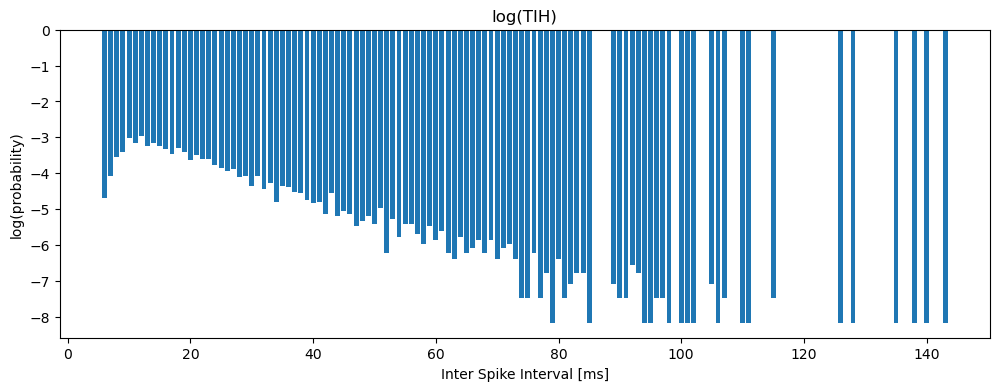

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(1,np.max(isi_vec)-1,1),np.log(tih))
__ = ax.set_title('log(TIH)')
ax.set_xlabel('Inter Spike Interval [ms]')
ax.set_ylabel('log(probability)');

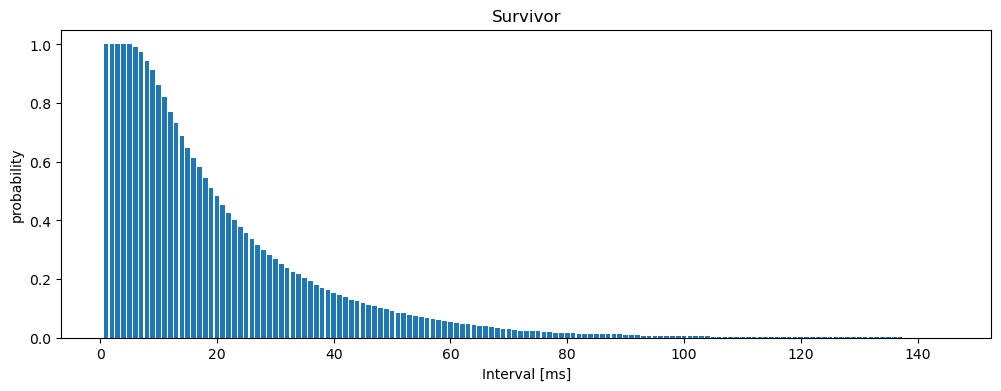

In [8]:
survivor = 1 - np.cumsum(tih)

fig, ax = plt.subplots(figsize = (12,4))
ax.bar(np.arange(1,np.max(isi_vec)-1,1),survivor)
__ = ax.set_title('Survivor')
ax.set_xlabel('Interval [ms]')
ax.set_ylabel('probability');

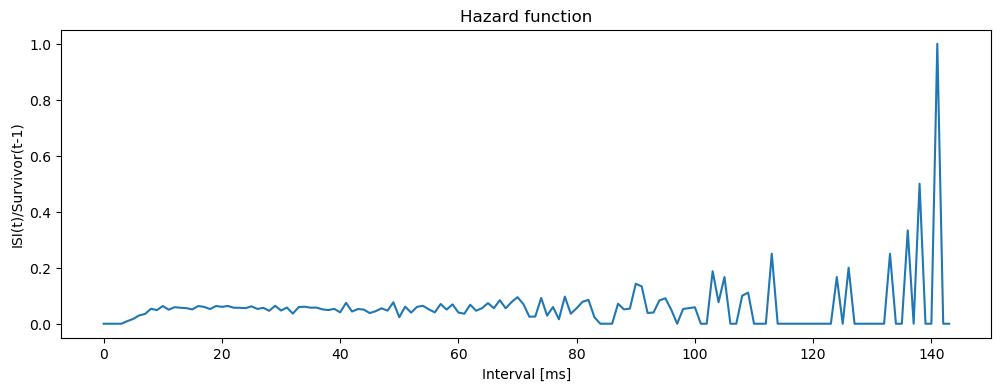

In [9]:
hazard = tih[1:] / survivor[0:-1]

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(hazard)
ax.set_title('Hazard function')
ax.set_xlabel('Interval [ms]')
ax.set_ylabel('ISI(t)/Survivor(t-1)');


3550.0


array([0.00000000e+00, 6.19424248e-18, 5.10114086e-18, ...,
       5.82987527e-18, 0.00000000e+00, 2.91493764e-18])

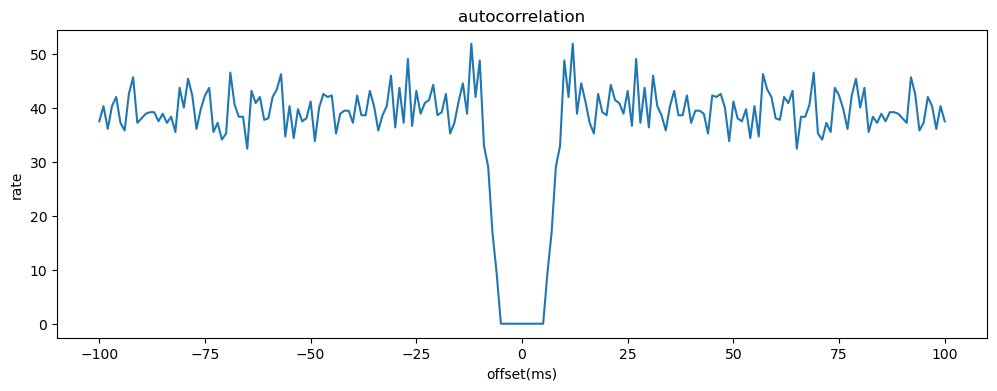

In [10]:
num_spikes = sum(spk_train)
print(num_spikes)
autocorr_count = sig.correlate(spk_train, spk_train)
autocorr_count[len(spk_train)-1] = 0
autocorr_prob = autocorr_count / num_spikes # 
autocorr_rate = autocorr_prob / (1/1000)

autocorr_range = [-100,100]
autocorr_arange = np.arange(autocorr_range[0],autocorr_range[1]+1)

autocorr_rate = autocorr_rate[len(spk_train)+autocorr_range[0]-1:len(spk_train)+autocorr_range[1]]

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(autocorr_arange, autocorr_rate)
ax.set_title('autocorrelation')
__ = ax.set_ylabel('rate')
__ = ax.set_xlabel('offset(ms)')

autocorr_prob

In [11]:
samp = 1000                   # Sampling rate [1/s]
rate = 55 / samp              # Firing rate [spikes/s]
duration = 90               # Duration of the spike train [s]

compare_spk_array = (np.random.uniform(size=samp*duration)<rate).astype(np.int32)
compare_time_array = np.arange(0, duration, 1/samp)

In [12]:
compare_spk_times = np.flatnonzero(compare_spk_array) * 1000 / samp  # Switch from bins to milliseconds
compare_spk_intervals = np.diff(compare_spk_times)
compare_tih, _ = np.histogram(compare_spk_intervals, bins=np.arange(1,np.max(compare_spk_intervals)), density=True)

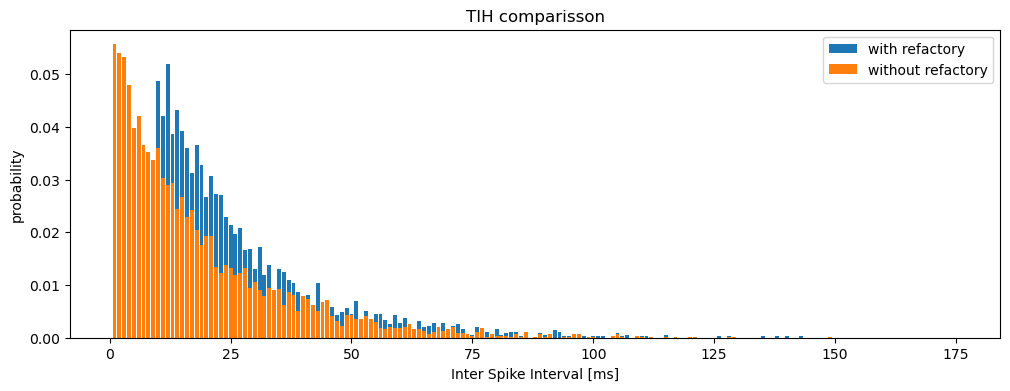

In [13]:
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(1,np.max(isi_vec)-1,1),tih, label="with refactory")
ax.bar(np.arange(1,np.max(compare_spk_intervals)-1,1),compare_tih, label="without refactory")

__ = ax.set_title('TIH comparisson')
ax.set_xlabel('Inter Spike Interval [ms]')
ax.set_ylabel('probability')
ax.legend()

/var/folders/zx/4crzfjcj5z1bc5krk4ps21lh0000gq/T/ipykernel_41030/3317568585.py:2: RuntimeWarning: divide by zero encountered in log
  ax.bar(np.arange(1,np.max(isi_vec)-1,1),np.log(tih), label="with refactory")
/var/folders/zx/4crzfjcj5z1bc5krk4ps21lh0000gq/T/ipykernel_41030/3317568585.py:3: RuntimeWarning: divide by zero encountered in log
  ax.bar(np.arange(1,np.max(compare_spk_intervals)-1,1),np.log(compare_tih), label="without refactory")


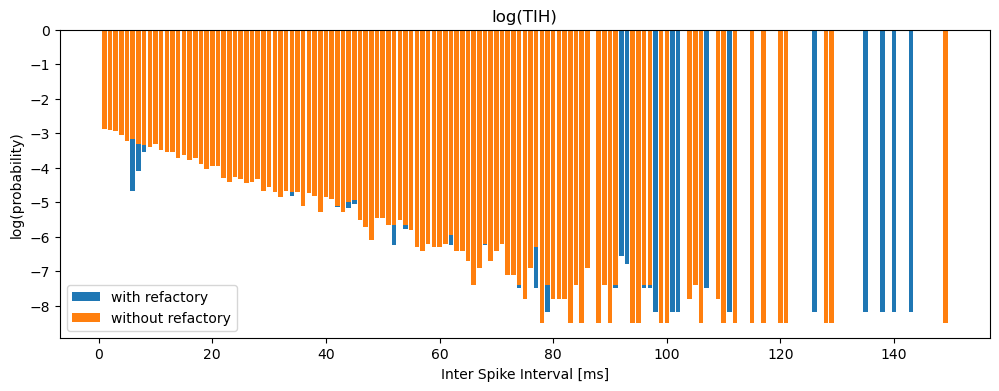

In [14]:
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(1,np.max(isi_vec)-1,1),np.log(tih), label="with refactory")
ax.bar(np.arange(1,np.max(compare_spk_intervals)-1,1),np.log(compare_tih), label="without refactory")

__ = ax.set_title('log(TIH)')
ax.set_xlabel('Inter Spike Interval [ms]')
ax.set_ylabel('log(probability)')
ax.legend()

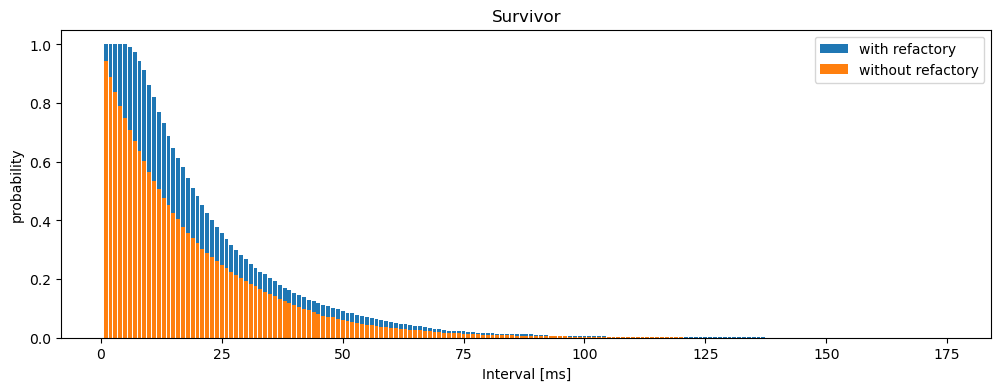

In [15]:
survivor = 1 - np.cumsum(tih)
compare_survivor = 1 - np.cumsum(compare_tih)

fig, ax = plt.subplots(figsize = (12,4))
ax.bar(np.arange(1,np.max(isi_vec)-1,1),survivor, label="with refactory")
ax.bar(np.arange(1,np.max(compare_spk_intervals)-1,1),compare_survivor, label="without refactory")

__ = ax.set_title('Survivor')
ax.set_xlabel('Interval [ms]')
ax.set_ylabel('probability')
ax.legend()

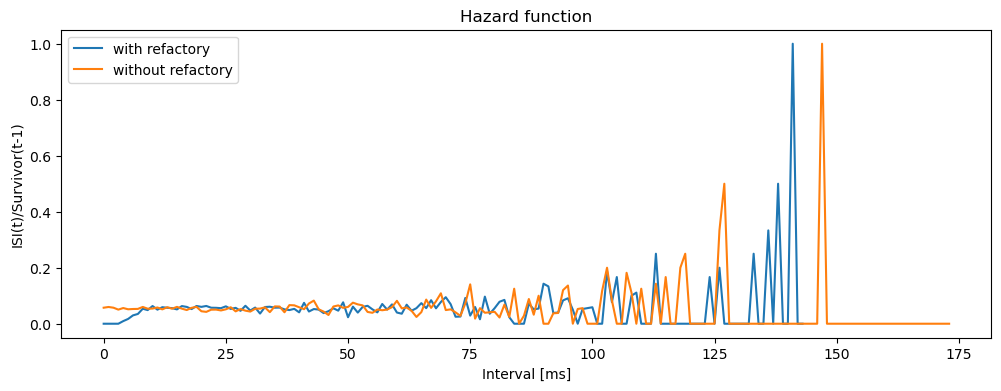

In [16]:
hazard = tih[1:] / survivor[0:-1]
compare_hazard = compare_tih[1:] / compare_survivor[0:-1]

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(hazard, label="with refactory")
ax.plot(compare_hazard, label="without refactory")
ax.set_title('Hazard function')
ax.set_xlabel('Interval [ms]')
ax.set_ylabel('ISI(t)/Survivor(t-1)');
ax.legend()

3550.0


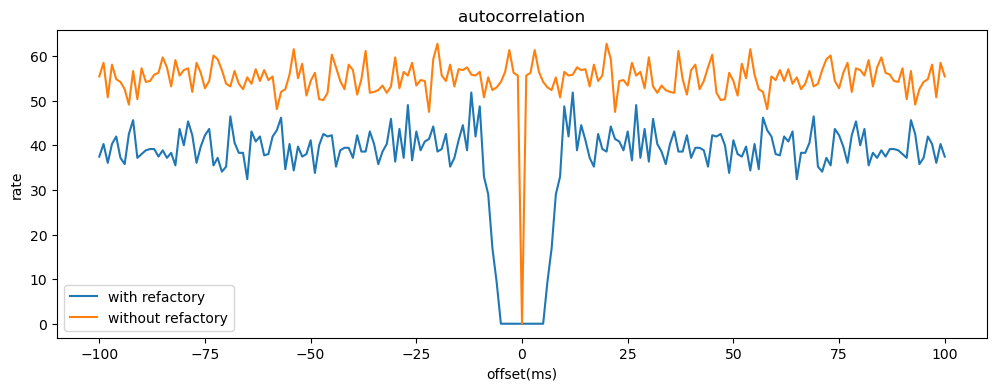

In [17]:
num_spikes = sum(spk_train)
print(num_spikes)
autocorr_count = sig.correlate(spk_train, spk_train)
autocorr_count[len(spk_train)-1] = 0
autocorr_prob = autocorr_count / num_spikes 
autocorr_rate = autocorr_prob / (1/1000)

compare_num_spikes = sum(compare_spk_array)
compare_autocorr_count = sig.correlate(compare_spk_array, compare_spk_array)
compare_autocorr_count[len(compare_spk_array)-1] = 0
compare_autocorr_prob = compare_autocorr_count / compare_num_spikes # 
compare_autocorr_rate = compare_autocorr_prob / (1/1000)


autocorr_range = [-100,100]
autocorr_arange = np.arange(autocorr_range[0],autocorr_range[1]+1)

autocorr_rate = autocorr_rate[len(spk_train)+autocorr_range[0]-1:len(spk_train)+autocorr_range[1]]
compare_autocorr_rate = compare_autocorr_rate[len(compare_spk_array)+autocorr_range[0]-1:len(compare_spk_array)+autocorr_range[1]]


fig, ax = plt.subplots(figsize=(12,4))
ax.plot(autocorr_arange, autocorr_rate, label="with refactory")
ax.plot(autocorr_arange, compare_autocorr_rate, label="without refactory")

ax.set_title('autocorrelation')
__ = ax.set_ylabel('rate')
__ = ax.set_xlabel('offset(ms)')
ax.legend()